# Vehicle users segmentation

This dataset has been obtained from a famous car dealer website.This dataset contains the details of around 200 indian cars and has features like the price of the car, the type of fuel it consumes, its torque etc. Our goal here is to make user segments according to the vehicle they use.


In [31]:
#importing the required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder


In [18]:
# Load the datasets
icd = pd.read_csv('C:\\Users\\sujoydutta\\Desktop\\Data analysis\\Internships\\Feynn Labs\\Electric vehicle India\\CARS_1.csv')
icd.head()

,car_name,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,avg_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
0,Maruti Alto K10,Petrol,998,3,5,Automatic,27.0,Hatchback,4.5,491000,89.0,3500,65.71,5500
1,Maruti Brezza,Petrol,1462,4,5,Automatic,48.0,SUV,4.5,1097500,136.8,4400,101.65,6000
2,Mahindra Thar,Diesel,2184,4,4,Automatic,57.0,SUV,4.5,1478000,300.0,2800,130.00,3750
3,Mahindra XUV700,Diesel,2198,4,7,Automatic,60.0,SUV,4.5,1888000,450.0,2800,182.38,3500
4,Mahindra Scorpio-N,Diesel,2198,4,7,Automatic,57.0,SUV,4.5,1794500,400.0,2750,172.45,3500


In [19]:
#examining the dataset
icd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             203 non-null    object 
 1   fuel_type            203 non-null    object 
 2   engine_displacement  203 non-null    int64  
 3   no_cylinder          203 non-null    int64  
 4   seating_capacity     203 non-null    int64  
 5   transmission_type    203 non-null    object 
 6   fuel_tank_capacity   203 non-null    float64
 7   body_type            203 non-null    object 
 8   rating               203 non-null    float64
 9   avg_price            203 non-null    int64  
 10  max_torque_nm        203 non-null    float64
 11  max_torque_rpm       203 non-null    int64  
 12  max_power_bhp        203 non-null    float64
 13  max_power_rp         203 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 22.3+ KB


In [20]:
#dropping null values


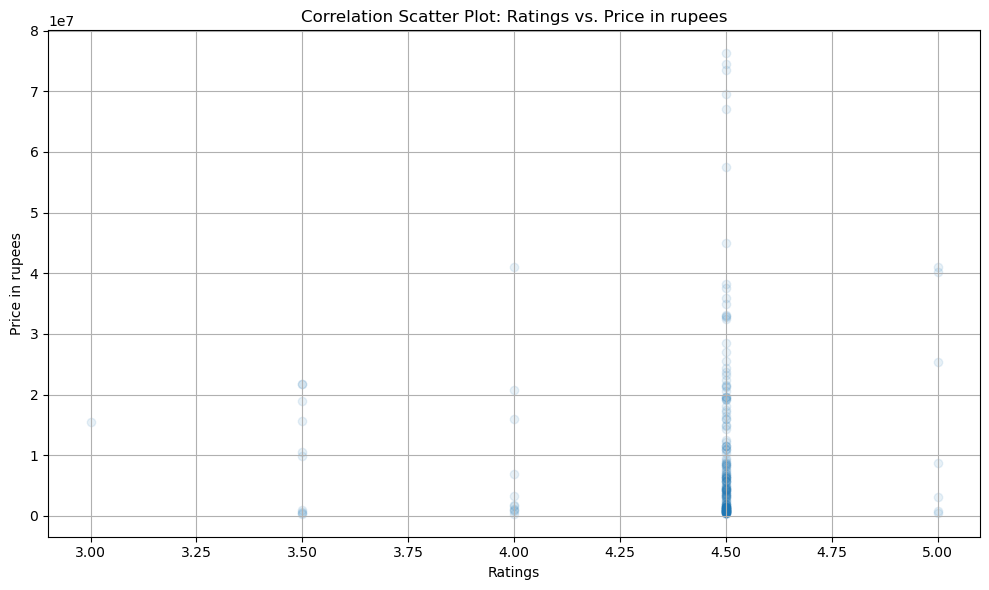

In [21]:
# Correlation between rating and average price 
plt.figure(figsize=(10, 6))
plt.scatter(icd['rating'], icd['avg_price'], alpha=0.1)
plt.xlabel('Ratings')
plt.ylabel('Price in rupees')
plt.title('Correlation Scatter Plot: Ratings vs. Price in rupees')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# Calculating the correlation coefficient
correlation_coefficient = icd['rating'].corr(icd['avg_price'])

print(f"Correlation Coefficient between AQI and % Renewable: {correlation_coefficient}")

Correlation Coefficient between AQI and % Renewable: 0.03350220450871702


*Comment: Absolutely no correlation between rating and car price*

In [23]:
# correlation matrix
correlation_matrix = icd.corr()
correlation_matrix

,engine_displacement,no_cylinder,seating_capacity,fuel_tank_capacity,rating,avg_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
engine_displacement,1.000000,0.948265,-0.277966,0.403951,-0.040186,0.632728,0.678812,0.399129,0.723541,0.427978
no_cylinder,0.948265,1.000000,-0.289816,0.381672,-0.089962,0.590956,0.615500,0.474884,0.686595,0.523751
seating_capacity,-0.277966,-0.289816,1.000000,-0.013077,0.201402,-0.296028,-0.226848,-0.187166,-0.389978,-0.209913
fuel_tank_capacity,0.403951,0.381672,-0.013077,1.000000,0.023962,0.163430,0.094807,0.322906,0.151109,0.330376
rating,-0.040186,-0.089962,0.201402,0.023962,1.000000,0.033502,-0.011984,-0.041517,-0.036662,-0.019821
avg_price,0.632728,0.590956,-0.296028,0.163430,0.033502,1.000000,0.636429,0.107133,0.675211,0.090975
max_torque_nm,0.678812,0.615500,-0.226848,0.094807,-0.011984,0.636429,1.000000,0.067723,0.917634,0.003525
max_torque_rpm,0.399129,0.474884,-0.187166,0.322906,-0.041517,0.107133,0.067723,1.000000,0.247916,0.865030
max_power_bhp,0.723541,0.686595,-0.389978,0.151109,-0.036662,0.675211,0.917634,0.247916,1.000000,0.186773
max_power_rp,0.427978,0.523751,-0.209913,0.330376,-0.019821,0.090975,0.003525,0.865030,0.186773,1.000000


<AxesSubplot: >

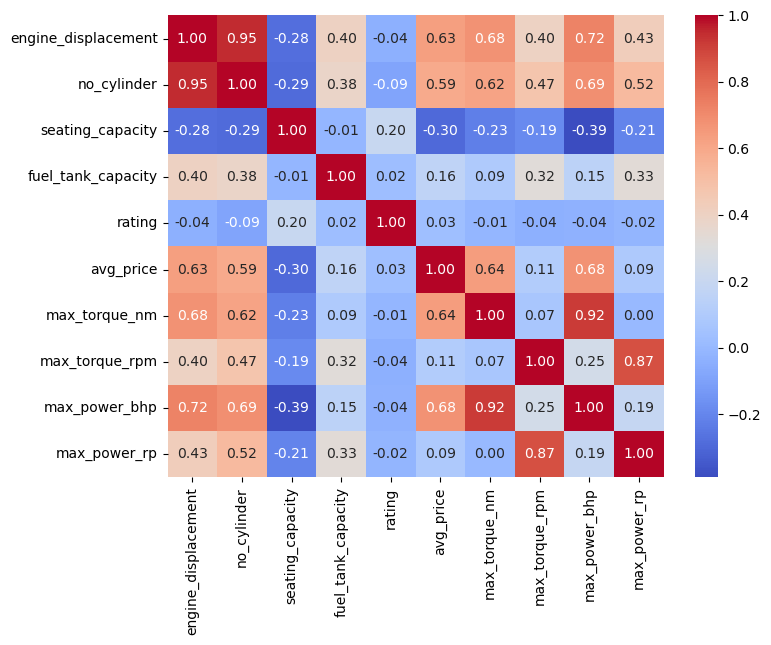

In [24]:
# correlation plot 
plt.figure(figsize=(8, 6)) 
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")


In [25]:
#Taking a subset
variables = ['engine_displacement', 'no_cylinder', 'seating_capacity', 'fuel_tank_capacity', 'rating', 'avg_price',
             'max_torque_nm', 'max_torque_rpm', 'max_power_bhp', 'max_power_rp']


subset_df = icd[variables]
subset_df



,engine_displacement,no_cylinder,seating_capacity,fuel_tank_capacity,rating,avg_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
0,998,3,5,27.0,4.5,491000,89.0,3500,65.71,5500
1,1462,4,5,48.0,4.5,1097500,136.8,4400,101.65,6000
2,2184,4,4,57.0,4.5,1478000,300.0,2800,130.00,3750
3,2198,4,7,60.0,4.5,1888000,450.0,2800,182.38,3500
4,2198,4,7,57.0,4.5,1794500,400.0,2750,172.45,3500
...,...,...,...,...,...,...,...,...,...,...
198,1991,4,5,0.0,4.5,829000,500.0,5250,415.71,6750
199,1998,4,5,59.0,4.5,1041000,400.0,4400,254.79,5000
200,1956,4,7,60.0,4.5,1845000,350.0,2500,167.67,3750
201,3998,8,5,85.0,3.5,21700000,800.0,4500,591.39,6000


In [27]:
#top 10 costliest cars
car_price = icd.groupby('car_name')['avg_price'].sum()

top_ten_costliest_cars = car_price.sort_values(ascending=False).head(10)
top_ten_costliest_cars

car_name
Lamborghini Aventador    76250000
Rolls-Royce Ghost        74500000
Jaguar I-Pace            73500000
Rolls-Royce Cullinan     69500000
Rolls Royce Wraith       67150000
Ferrari 812              57500000
Mclaren GT               45000000
BMW X5 M                 41000000
Bentley Bentayga         41000000
Maserati GranTurismo     40200000
Name: avg_price, dtype: int64

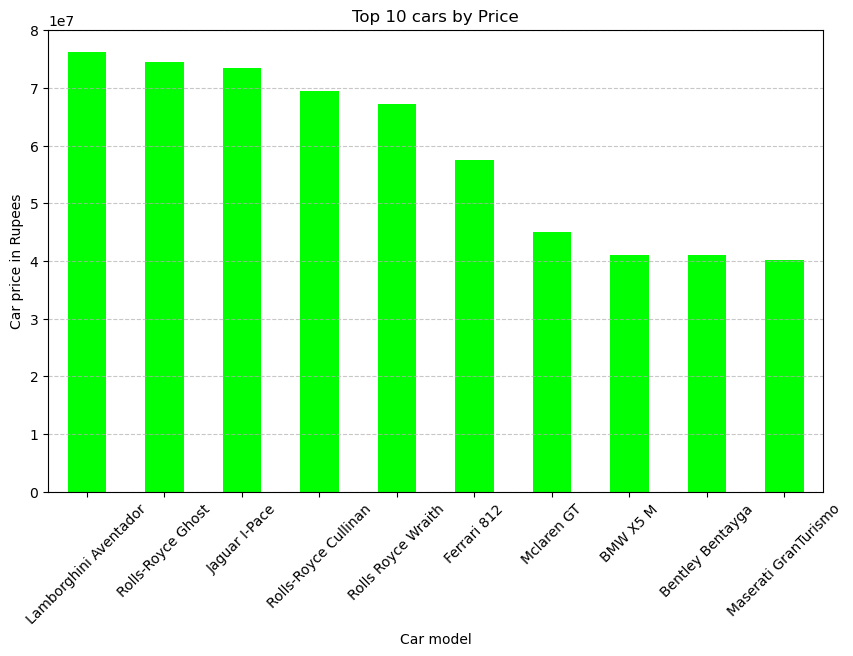

In [29]:
# Creating a bar graph
plt.figure(figsize=(10, 6))
top_ten_costliest_cars.plot(kind='bar', color='lime')
plt.xlabel('Car model')
plt.ylabel('Car price in Rupees')
plt.title('Top 10 cars by Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [33]:
# Creating an instance of OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fitting and transforming the categorical variables
encoded_categories = encoder.fit_transform(icd[['car_name','fuel_type','transmission_type','body_type']])

# Creating a DataFrame with the one-hot encoded columns
encoded_icd = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names(['car_name','fuel_type','transmission_type','body_type']))
encoded_icd

C:\Users\sujoydutta\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,car_name_Aston Martin DBX,car_name_Aston Martin Vantage,car_name_Audi A4,car_name_Audi A6,car_name_Audi Q2,car_name_Audi Q5,car_name_Audi Q7,car_name_Audi RS Q8,car_name_Audi RS7,car_name_Audi e-tron,...,body_type_Coupe,body_type_Hatchback,body_type_Hybrid,body_type_Luxury,body_type_MUV,body_type_Minivan,body_type_Pickup Truck,body_type_SUV,body_type_Sedan,body_type_Wagon
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [35]:
# Standardizing the numerical features
scaler = StandardScaler()
numerical_cols = ['engine_displacement', 'no_cylinder', 'seating_capacity', 'fuel_tank_capacity', 'rating', 'avg_price',
             'max_torque_nm', 'max_torque_rpm', 'max_power_bhp', 'max_power_rp']

encoded_icd[numerical_cols] = scaler.fit_transform(icd[numerical_cols])

encoded_icd[numerical_cols]

,engine_displacement,no_cylinder,seating_capacity,fuel_tank_capacity,rating,avg_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
0,-0.877709,-0.674995,-0.012792,-0.663958,0.237980,-0.679006,-1.326691,0.096474,-1.040774,0.357434
1,-0.566332,-0.280113,-0.012792,0.064376,0.237980,-0.636945,-1.124605,0.662146,-0.854554,0.609201
2,-0.081818,-0.280113,-0.878355,0.376519,0.237980,-0.610557,-0.434634,-0.343494,-0.707661,-0.523749
3,-0.072423,-0.280113,1.718335,0.480567,0.237980,-0.582123,0.199530,-0.343494,-0.436259,-0.649632
4,-0.072423,-0.280113,1.718335,0.376519,0.237980,-0.588607,-0.011858,-0.374920,-0.487711,-0.649632
...,...,...,...,...,...,...,...,...,...,...
198,-0.211335,-0.280113,-0.012792,-1.600387,0.237980,-0.655565,0.410918,1.196393,0.772719,0.986850
199,-0.206637,-0.280113,-0.012792,0.445885,0.237980,-0.640863,-0.011858,0.662146,-0.061073,0.105668
200,-0.234822,-0.280113,1.718335,0.480567,0.237980,-0.585105,-0.223246,-0.532051,-0.512478,-0.523749
201,1.135506,1.299414,-0.012792,1.347631,-3.340536,0.791862,1.679246,0.724999,1.682989,0.609201


In [37]:
# Applying PCA to the combined numerical features
pca = PCA(n_components=2)  
pca_result = pca.fit_transform(encoded_icd[numerical_cols])
pca_result

array([[-1.83624445e+00, -1.00691774e+00],
       [-1.02044998e+00, -1.54559093e+00],
       [-7.84849524e-01, -1.01972080e-01],
       [-9.70322800e-01,  1.66729611e-01],
       [-1.09757320e+00,  1.17060572e-01],
       [-5.16947777e-01,  1.50518020e-01],
       [-1.30010135e+00, -2.29142486e-01],
       [-1.58120489e+00, -1.14353999e+00],
       [-2.04528000e+00, -1.95726397e-01],
       [-1.18386722e+00, -1.54069733e+00],
       [-1.34230719e+00, -1.66755039e-01],
       [-1.32573068e+00, -1.28079666e+00],
       [-1.29952483e+00, -2.28659495e-01],
       [-6.83567699e-01,  1.34547056e-01],
       [-9.57259026e-01,  1.76195766e-01],
       [-1.24266487e+00, -1.50035817e+00],
       [-1.36759893e+00,  9.53097446e-02],
       [-1.39302884e+00, -1.58083024e+00],
       [-1.28165803e+00, -2.25382465e-01],
       [-1.24359285e+00, -1.50112452e+00],
       [-9.14246302e-01, -1.67137437e+00],
       [ 2.11460283e+00,  8.16555316e-01],
       [-1.46877204e+00, -1.45580584e+00],
       [-1.

In [38]:
# seeing the weightage  of variables in each principal component
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=numerical_cols, index=['PC1', 'PC2'])
print("Variable Loadings in Principal Components:")
print(loadings_df)

Variable Loadings in Principal Components:
     engine_displacement  no_cylinder  seating_capacity  fuel_tank_capacity  \
PC1             0.439420     0.437180         -0.203132            0.191917   
PC2             0.011951    -0.061751         -0.037203           -0.287947   

       rating  avg_price  max_torque_nm  max_torque_rpm  max_power_bhp  \
PC1 -0.033812   0.343102       0.360873        0.249949       0.406556   
PC2  0.021760   0.283340       0.382589       -0.539030       0.269319   

     max_power_rp  
PC1      0.246648  
PC2     -0.567037  


**Observation:** The first Component can be called the Performance component and the second compnent could be called Efficiency component. 


In [39]:
# Creating a new DataFrame with PCA components
pca_icd = pd.DataFrame(data=pca_result, columns=['Performance_component', 'Efficiency_component'])
pca_icd



,Performance_component,Efficiency_component
0,-1.836244,-1.006918
1,-1.020450,-1.545591
2,-0.784850,-0.101972
3,-0.970323,0.166730
4,-1.097573,0.117061
...,...,...
198,0.252045,-0.543647
199,-0.190560,-0.727310
200,-1.242344,0.011925
201,3.334609,0.056924


In [45]:
# Finding the optimal number of clusters using the Elbow Method
wcss = []  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(pca_icd[['Performance_component', 'Efficiency_component']])
    wcss.append(kmeans.inertia_)


C:\Users\sujoydutta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sujoydutta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sujoydutta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sujoydutta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a m

In [46]:
# Determine the optimal number of clusters using the "Elbow Method"
optimal_clusters = None
for i in range(1, len(wcss) - 1):
    reduction_ratio = (wcss[i] - wcss[i + 1]) / (wcss[i - 1] - wcss[i])
    if reduction_ratio > 0.9:
        optimal_clusters = i + 1 
        break

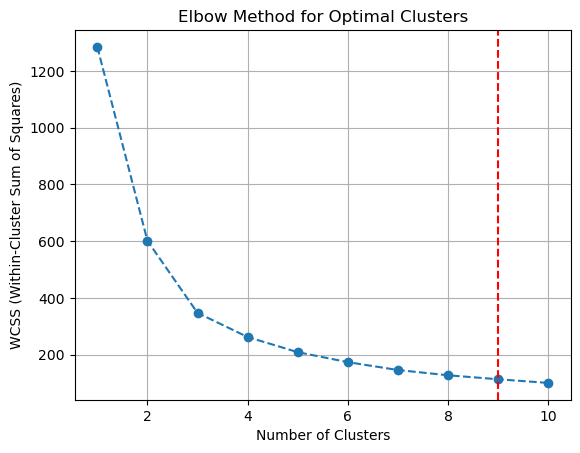

In [47]:
# Plotting the Elbow Method graph and highlight the optimal cluster count
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
if optimal_clusters is not None:
    plt.axvline(x=optimal_clusters, color='red', linestyle='--')
plt.grid(True)
plt.show()


*Conclusion:We need to make 9 number of clusters*

In [48]:
# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
pca_icd['Cluster'] = kmeans.fit_predict(pca_icd[['Performance_component', 'Efficiency_component']])
pca_icd['Cluster']

C:\Users\sujoydutta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0      3
1      3
2      0
3      0
4      0
      ..
198    6
199    6
200    0
201    1
202    3
Name: Cluster, Length: 203, dtype: int32

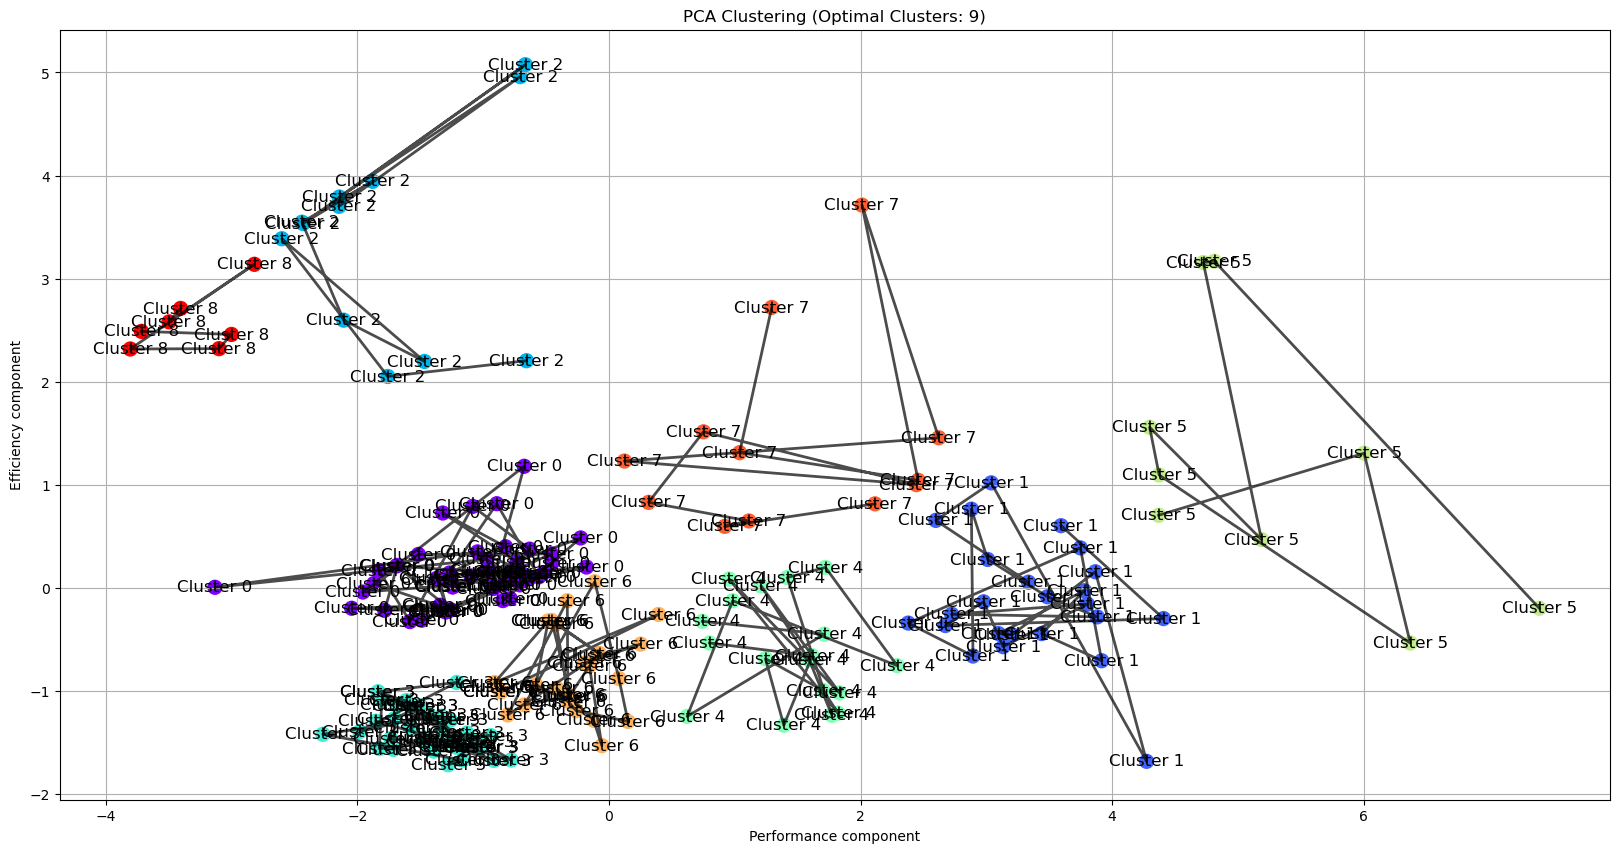

In [55]:
# Plotting the clusters
plt.figure(figsize=(20, 10))
scatter = plt.scatter(pca_icd['Performance_component'], pca_icd['Efficiency_component'], c=pca_icd['Cluster'], cmap='rainbow', s=100)


for i, txt in enumerate(pca_icd['Cluster']):
    plt.annotate(f'Cluster {txt}', (pca_icd['Performance_component'][i], pca_icd['Efficiency_component'][i]), fontsize=12, color='black', ha='center', va='center')

for cluster_num in set(pca_icd['Cluster']):
    cluster_points = pca_icd[pca_icd['Cluster'] == cluster_num]
    plt.plot(cluster_points['Performance_component'], cluster_points['Efficiency_component'], linestyle='-', linewidth=2, color='black', alpha=0.7)


plt.xlabel('Performance component')
plt.ylabel('Efficiency component')
plt.title(f'PCA Clustering (Optimal Clusters: {optimal_clusters})')


plt.grid(True)
plt.show()

**Comments:** 

We can see there is a trade off between Efficiency and Performance.Most Indians are in clusters 3,0 and 6 which means poor Performance and Efficiency. This should not come as a surprise because India is a lower per capita income country. The clusters 2 and 8 are the price sensitive ones who prefer having fuel efficiency. Cluster 4 reflect the Upper Middle class who prefer Performance over efficiency as a social status symbol  while the ones in cluster 7 try to take the best from both worlds.  Cluster 1 people appear to be the ones who totally disregard efficiency and appear to be young blooded and nouveau riche type of people to whom performance means everything and they dont care about the costs. Finally Cluster 5 appears to be the optimum as they can afford performance as well as efficieny. They appear to be people with generational wealth which is less per cent of the indian population that is India being a poor and backward country. All the cars in this list are fossil fuel vehicles which means Electric Vehicles are not there in the market. I think the company should keep a flexible price range according to the various segments. The clusters 8 and 2 appear to be ideal consumers as they seem to be concerned over fuel costs and hence ideal consumer for electric vehicles as electricity is cheaper than fossil fuels. 

In [59]:
# Concatenating the dataframes side by side
icd_consolidated = pd.concat([icd, pca_icd], axis=1)

icd_consolidated

,car_name,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,avg_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp,Performance_component,Efficiency_component,Cluster
0,Maruti Alto K10,Petrol,998,3,5,Automatic,27.0,Hatchback,4.5,491000,89.0,3500,65.71,5500,-1.836244,-1.006918,3
1,Maruti Brezza,Petrol,1462,4,5,Automatic,48.0,SUV,4.5,1097500,136.8,4400,101.65,6000,-1.020450,-1.545591,3
2,Mahindra Thar,Diesel,2184,4,4,Automatic,57.0,SUV,4.5,1478000,300.0,2800,130.00,3750,-0.784850,-0.101972,0
3,Mahindra XUV700,Diesel,2198,4,7,Automatic,60.0,SUV,4.5,1888000,450.0,2800,182.38,3500,-0.970323,0.166730,0
4,Mahindra Scorpio-N,Diesel,2198,4,7,Automatic,57.0,SUV,4.5,1794500,400.0,2750,172.45,3500,-1.097573,0.117061,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Mercedes-Benz AMG A 45 S,Petrol,1991,4,5,Automatic,0.0,Hatchback,4.5,829000,500.0,5250,415.71,6750,0.252045,-0.543647,6
199,BMW 3 Series Gran Limousine,Petrol,1998,4,5,Automatic,59.0,Sedan,4.5,1041000,400.0,4400,254.79,5000,-0.190560,-0.727310,6
200,MG Hector Plus,Diesel,1956,4,7,Manual,60.0,SUV,4.5,1845000,350.0,2500,167.67,3750,-1.242344,0.011925,0
201,Audi RS Q8,Petrol,3998,8,5,Automatic,85.0,SUV,3.5,21700000,800.0,4500,591.39,6000,3.334609,0.056924,1


In [60]:
#seeing the cars by segment
icd_subset = icd_consolidated.iloc[:, [0, -1]]
icd_subset

,car_name,Cluster
0,Maruti Alto K10,3
1,Maruti Brezza,3
2,Mahindra Thar,0
3,Mahindra XUV700,0
4,Mahindra Scorpio-N,0
...,...,...
198,Mercedes-Benz AMG A 45 S,6
199,BMW 3 Series Gran Limousine,6
200,MG Hector Plus,0
201,Audi RS Q8,1


In [61]:
# Grouping the dataframe by cluster and displaying the respective cars by their cluster
result = icd_subset.groupby('Cluster')['car_name'].agg(', '.join).reset_index()
pd.set_option('display.max_colwidth', None)
result

,Cluster,car_name
0,0,"Mahindra Thar, Mahindra XUV700, Mahindra Scorpio-N, Toyota Fortuner, Hyundai Creta, Mahindra Bolero, Tata Nexon, Kia Seltos, Hyundai Tucson, Tata Harrier, Toyota Innova Crysta, Kia Sonet, Mahindra XUV300, MG Hector, Tata Altroz, Mahindra Scorpio Classic, Hyundai Verna, Citroen C3, Honda City, Honda Amaze, Hyundai Alcazar, Mercedes-Benz GLA, Jeep Wrangler, Force Gurkha, Toyota Hilux, MG Gloster, Honda WR-V, Nissan Kicks, Mahindra Marazzo, Mercedes-Benz C-Class, Mahindra Alturas G4, BMW 2 Series, Isuzu D-Max, Citroen C5 Aircross, Isuzu MU-X, Jaguar XF, Mercedes-Benz GLC, Tata Yodha Pickup, Mahindra E Verito, Mercedes-Benz V-Class, Mini Cooper Convertible, Mini Cooper Countryman, Mini Cooper 3 DOOR, Mercedes-Benz CLS, Mahindra Bolero PikUp ExtraLong, Mahindra Bolero Camper, Mahindra Bolero Neo, Mahindra Bolero Neo, Mercedes-Benz GLC Coupe, Compass Trailhawk, Jeep Meridian, MG Hector Plus"
1,1,"Lamborghini Urus, Ferrari Roma, Mercedes-Benz GLS, Porsche Cayenne, Jaguar F-Pace, Mercedes-Benz AMG GT, Maserati Quattroporte, Ferrari Portofino, Aston Martin DBX, Audi RS7, Mercedes-Benz AMG GLE 63 S, Nissan GT-R, Porsche 911, Bentley Bentayga, Ferrari SF90 Stradale, Maserati GranTurismo, Ferrari F8 Tributo, BMW 8 Series, Aston Martin Vantage, BMW X5 M, Lamborghini Huracan EVO, Porsche Cayenne Coupe, Porsche Cayenne Coupe, Audi RS Q8"
2,2,"Volvo XC90, Volvo XC40, Kia EV6, Volvo S90, Volvo S60, Audi e-tron, Porsche Taycan, BMW iX, Mercedes-Benz EQS, Mercedes-Benz EQC, Jaguar I-Pace, Audi e-tron GT"
3,3,"Maruti Alto K10, Maruti Brezza, Tata Punch, Maruti Swift, Hyundai Venue, Maruti Baleno, Maruti Ertiga, Maruti Dzire, Honda City 4th Generation, Tata Tiago, Hyundai i20, Maruti Celerio, Nissan Magnite, Renault KWID, Maruti Alto 800, Tata Tigor, Renault Kiger, Maruti S-Presso, MG Astor, Renault Triber, Hyundai Aura, Maruti Ignis, Maruti XL6, Maruti Eeco, Maruti S-Cross, Maruti Ciaz, Hyundai Santro, Honda Jazz, Bajaj Qute (RE60), Volkswagen Vento, Datsun redi-GO, Datsun GO, Tata Tiago NRG, Mahindra KUV 100 NXT, Datsun GO Plus, Hyundai Xcent Prime, Toyota Glanza, Toyota Glanza, Honda City Hybrid, Maruti Alto 800 tour"
4,4,"BMW X5, BMW Z4, BMW X6, BMW 7 Series, Porsche Macan, Lexus LS, Mercedes-Benz S-Class, Maserati Levante, Mercedes-Benz G-Class, BMW M2, Lexus LC 500h, Mercedes-Benz GLE, BMW M4 Competition, Mercedes-Benz AMG GLE 53, Mercedes-Benz AMG C 43, Lexus RX, Lexus LX, Mercedes-Benz AMG GLC 43"
5,5,"Lamborghini Aventador, Rolls-Royce Ghost, Rolls-Royce Cullinan, Bentley Flying Spur, Mercedes-Benz Maybach S-Class, Bentley Continental, Ferrari 812, Rolls Royce Wraith, Rolls Royce Dawn"
6,6,"Volkswagen Virtus, Skoda Slavia, Skoda Kushaq, Volkswagen Taigun, Audi Q7, Toyota Vellfire, BMW X1, Toyota Camry, Volkswagen Tiguan, Skoda Octavia, Skoda Superb, Audi A6, Land Rover Range Rover Velar, Volvo XC60, Skoda Kodiaq, Audi A4, BMW X3, BMW 3 Series Gran Limousine, Audi Q5, Audi Q2, Jaguar XE, Lexus ES, Lexus NX, Land Rover Discovery Sport, Mercedes-Benz A-Class Limousine, Maruti Swift Dzire Tour, Mercedes-Benz AMG A 35, Mercedes-Benz AMG A 45 S, BMW 3 Series Gran Limousine"
7,7,"Land Rover Range Rover, Land Rover Defender, BMW X7, Mercedes-Benz E-Class, Land Rover Range Rover Sport, Jaguar F-TYPE, BMW 5 Series, Mercedes-Benz AMG G 63, Mclaren GT, Porsche Panamera, Maserati Ghibli, Maserati GranCabrio"
8,8,"Hyundai Kona Electric, MG ZS EV, BMW i4, BYD E6, Mini Cooper SE, Strom Motors R3, Tata Nexon EV Max"


In [63]:
# Seeing the percentage of cars and count of cars in each cluster
result['Count'] = result['car_name'].apply(lambda x: len(x.split(', ')))


total_cars = len(icd_subset)
result['Percentage'] = (result['Count'] / total_cars) * 100


pd.set_option('display.max_colwidth', None)
result

,Cluster,car_name,Count,Percentage
0,0,"Mahindra Thar, Mahindra XUV700, Mahindra Scorpio-N, Toyota Fortuner, Hyundai Creta, Mahindra Bolero, Tata Nexon, Kia Seltos, Hyundai Tucson, Tata Harrier, Toyota Innova Crysta, Kia Sonet, Mahindra XUV300, MG Hector, Tata Altroz, Mahindra Scorpio Classic, Hyundai Verna, Citroen C3, Honda City, Honda Amaze, Hyundai Alcazar, Mercedes-Benz GLA, Jeep Wrangler, Force Gurkha, Toyota Hilux, MG Gloster, Honda WR-V, Nissan Kicks, Mahindra Marazzo, Mercedes-Benz C-Class, Mahindra Alturas G4, BMW 2 Series, Isuzu D-Max, Citroen C5 Aircross, Isuzu MU-X, Jaguar XF, Mercedes-Benz GLC, Tata Yodha Pickup, Mahindra E Verito, Mercedes-Benz V-Class, Mini Cooper Convertible, Mini Cooper Countryman, Mini Cooper 3 DOOR, Mercedes-Benz CLS, Mahindra Bolero PikUp ExtraLong, Mahindra Bolero Camper, Mahindra Bolero Neo, Mahindra Bolero Neo, Mercedes-Benz GLC Coupe, Compass Trailhawk, Jeep Meridian, MG Hector Plus",52,25.615764
1,1,"Lamborghini Urus, Ferrari Roma, Mercedes-Benz GLS, Porsche Cayenne, Jaguar F-Pace, Mercedes-Benz AMG GT, Maserati Quattroporte, Ferrari Portofino, Aston Martin DBX, Audi RS7, Mercedes-Benz AMG GLE 63 S, Nissan GT-R, Porsche 911, Bentley Bentayga, Ferrari SF90 Stradale, Maserati GranTurismo, Ferrari F8 Tributo, BMW 8 Series, Aston Martin Vantage, BMW X5 M, Lamborghini Huracan EVO, Porsche Cayenne Coupe, Porsche Cayenne Coupe, Audi RS Q8",24,11.822660
2,2,"Volvo XC90, Volvo XC40, Kia EV6, Volvo S90, Volvo S60, Audi e-tron, Porsche Taycan, BMW iX, Mercedes-Benz EQS, Mercedes-Benz EQC, Jaguar I-Pace, Audi e-tron GT",12,5.911330
3,3,"Maruti Alto K10, Maruti Brezza, Tata Punch, Maruti Swift, Hyundai Venue, Maruti Baleno, Maruti Ertiga, Maruti Dzire, Honda City 4th Generation, Tata Tiago, Hyundai i20, Maruti Celerio, Nissan Magnite, Renault KWID, Maruti Alto 800, Tata Tigor, Renault Kiger, Maruti S-Presso, MG Astor, Renault Triber, Hyundai Aura, Maruti Ignis, Maruti XL6, Maruti Eeco, Maruti S-Cross, Maruti Ciaz, Hyundai Santro, Honda Jazz, Bajaj Qute (RE60), Volkswagen Vento, Datsun redi-GO, Datsun GO, Tata Tiago NRG, Mahindra KUV 100 NXT, Datsun GO Plus, Hyundai Xcent Prime, Toyota Glanza, Toyota Glanza, Honda City Hybrid, Maruti Alto 800 tour",40,19.704433
4,4,"BMW X5, BMW Z4, BMW X6, BMW 7 Series, Porsche Macan, Lexus LS, Mercedes-Benz S-Class, Maserati Levante, Mercedes-Benz G-Class, BMW M2, Lexus LC 500h, Mercedes-Benz GLE, BMW M4 Competition, Mercedes-Benz AMG GLE 53, Mercedes-Benz AMG C 43, Lexus RX, Lexus LX, Mercedes-Benz AMG GLC 43",18,8.866995
5,5,"Lamborghini Aventador, Rolls-Royce Ghost, Rolls-Royce Cullinan, Bentley Flying Spur, Mercedes-Benz Maybach S-Class, Bentley Continental, Ferrari 812, Rolls Royce Wraith, Rolls Royce Dawn",9,4.433498
6,6,"Volkswagen Virtus, Skoda Slavia, Skoda Kushaq, Volkswagen Taigun, Audi Q7, Toyota Vellfire, BMW X1, Toyota Camry, Volkswagen Tiguan, Skoda Octavia, Skoda Superb, Audi A6, Land Rover Range Rover Velar, Volvo XC60, Skoda Kodiaq, Audi A4, BMW X3, BMW 3 Series Gran Limousine, Audi Q5, Audi Q2, Jaguar XE, Lexus ES, Lexus NX, Land Rover Discovery Sport, Mercedes-Benz A-Class Limousine, Maruti Swift Dzire Tour, Mercedes-Benz AMG A 35, Mercedes-Benz AMG A 45 S, BMW 3 Series Gran Limousine",29,14.285714
7,7,"Land Rover Range Rover, Land Rover Defender, BMW X7, Mercedes-Benz E-Class, Land Rover Range Rover Sport, Jaguar F-TYPE, BMW 5 Series, Mercedes-Benz AMG G 63, Mclaren GT, Porsche Panamera, Maserati Ghibli, Maserati GranCabrio",12,5.911330
8,8,"Hyundai Kona Electric, MG ZS EV, BMW i4, BYD E6, Mini Cooper SE, Strom Motors R3, Tata Nexon EV Max",7,3.448276
